In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import warnings as w
import sys
sys.path.append("../../..")
import Thermobar as pt

In [83]:
out_train=pt.import_excel('GlobalDataset_Final_rev9_TrainValidation.xlsx',
                          sheet_name='Train_Thermobar_Format')
out_train_input=out_train['my_input']
Cpx_train1=out_train['Cpxs']
AllElements=((Cpx_train1['Cr2O3_Cpx']>-1))# & (Cpx_train1['MnO_Cpx']>0) & (Cpx_train1['K2O_Cpx']>0))
Cpx_train=Cpx_train1.loc[AllElements]        
Cpx_train_noID_noT=Cpx_train.drop(['Sample_ID_Cpx'], axis=1)
x_train=Cpx_train_noID_noT.values
y_train_T=out_train_input['T_K'].loc[AllElements] 
y_train_P=out_train_input['P_GPa'].loc[AllElements]*10

In [84]:
## Test dataset
out_test=pt.import_excel('GlobalDataset_Final_rev9_TrainValidation.xlsx',
                          sheet_name='Test_Thermobar_Format')

out_test_input=out_test['my_input']
Cpx_test1=out_test['Cpxs']
AllElements=((Cpx_test1['Cr2O3_Cpx']>0) & (Cpx_test1['MnO_Cpx']>0) & (Cpx_test1['K2O_Cpx']>0))
Cpx_test=Cpx_test1.loc[AllElements]
Cpx_test_noID_noT=Cpx_test.drop(['Sample_ID_Cpx'], axis=1)
x_test=Cpx_test_noID_noT.values
y_test_T=out_test_input['T_K'].loc[AllElements] 
y_test_P=out_test_input['P_GPa'].loc[AllElements] *10

In [85]:
len(y_test_P)

16

## What proportion have Cr data

In [86]:
print('% of train data without Cr')
print(100*sum(Cpx_train['Cr2O3_Cpx']==0)/((sum(Cpx_train['Cr2O3_Cpx']>0 )+sum(Cpx_train['Cr2O3_Cpx']==0))))
print('% of train data without MnO')
print(100*sum(Cpx_train['MnO_Cpx']==0)/((sum(Cpx_train['MnO_Cpx']>0 )+sum(Cpx_train['MnO_Cpx']==0))))
print('% of train data without K2O')
print(100*sum(Cpx_train['K2O_Cpx']==0)/((sum(Cpx_train['K2O_Cpx']>0 )+sum(Cpx_train['K2O_Cpx']==0))))

% of train data without Cr
49.1764705882353
% of train data without MnO
13.882352941176471
% of train data without K2O
71.17647058823529


In [75]:
print('% of test data without Cr')
print(100*sum(Cpx_test['Cr2O3_Cpx']==0)/((sum(Cpx_test['Cr2O3_Cpx']>0 )+sum(Cpx_test['Cr2O3_Cpx']==0))))
print('% of test data without MnO')
print(100*sum(Cpx_test['MnO_Cpx']==0)/((sum(Cpx_test['MnO_Cpx']>0 )+sum(Cpx_test['MnO_Cpx']==0))))
print('% of test data without K2O')
print(100*sum(Cpx_test['K2O_Cpx']==0)/((sum(Cpx_test['K2O_Cpx']>0 )+sum(Cpx_test['K2O_Cpx']==0))))

% of test data without Cr
0.0
% of test data without MnO
0.0
% of test data without K2O
0.0


In [76]:
# Scaling
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the regressor, in our case the Extra Tree Regressor
regr_T = ExtraTreesRegressor(n_estimators=450, criterion='mse', 
                             max_features=9, random_state=120) # random_state fixed for reproducibility

# Define the regressor, in our case the Extra Tree Regressor
regr_P = ExtraTreesRegressor(n_estimators=450, criterion='mse', max_features=9, random_state=120) # random_state fixed for reproducibility

# Train the model
regr_T.fit(x_train_scaled, y_train_T.ravel())
regr_P.fit(x_train_scaled, y_train_P.ravel())

ExtraTreesRegressor(max_features=9, n_estimators=450, random_state=120)

## Predicting the test data for temp

'RMSE= 122.32442'

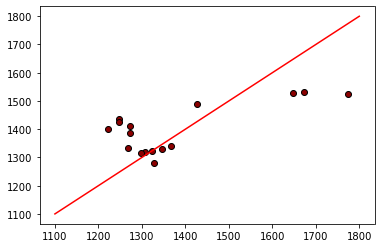

In [77]:
predicted_T=regr_T.predict(x_test_scaled)
plt.plot( y_test_T, predicted_T, 'ok', mfc='darkred')
plt.plot([1100, 1800], [1100, 1800], '-r')
Stats_T=pt.calculate_R2_np(y_test_T.values, predicted_T)
Stats_T['R2']
Stats_T['RMSE']

## Predicting the test data for Press

'R20.84'

'RMSE= 3.26597'

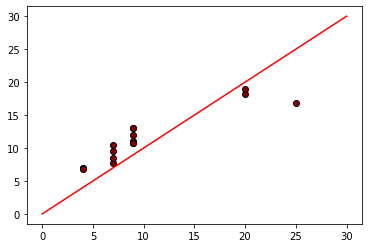

In [78]:
predicted_P=regr_P.predict(x_test_scaled)
plt.plot( y_test_P, predicted_P, 'ok', mfc='darkred')
plt.plot([0, 30], [0, 30], '-r')
Stats_P=pt.calculate_R2_np(y_test_P.values, predicted_P)
display(Stats_P['R2'])
Stats_P['RMSE']

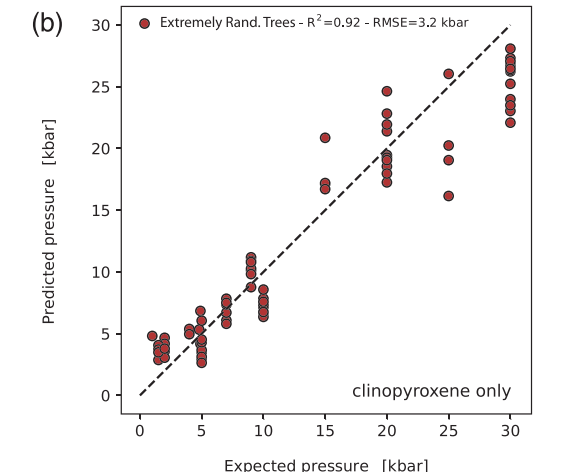

In [79]:
scaler

StandardScaler()

In [80]:
from pickle import dump
import pickle
dump(scaler, open('scaler_Petrelli2020_Cpx_Only_noCr.pkl', 'wb'))
dump(regr_P, open('ETR_Press_Petrelli2020_Cpx_Only_noCr.pkl', 'wb'))
dump(regr_T, open('ETR_Temp_Petrelli2020_Cpx_Only_noCr.pkl', 'wb'))


In [81]:
from pickle import load
scaler_P2020_Cpx_Only=load(open('scaler_Petrelli2020_Cpx_Only_noCr.pkl', 'rb'))
ETR_Temp_P2020_Cpx_Only=load(open('ETR_Temp_Petrelli2020_cpx_Only_noCr.pkl', 'rb'))
ETR_Press_P2020_Cpx_Only=load(open('ETR_Press_Petrelli2020_cpx_Only_noCr.pkl', 'rb'))

## Predicting from Thermobar

In [ ]:
pd.read_excel(r'../../../Thermobar/TestLoad.xlsx')

In [ ]:
load(open(r'../../../Thermobar/ETR_Press_Petrelli2020_Cpx_Only.pkl', 'rb'))

In [ ]:

P_func=pt.calculate_cpx_only_press(cpx_comps=Cpx_test, equationP="P_Petrelli2021_Cpx_only")
plt.plot(predicted_P, P_func, 'ok')
P_func.head()

In [ ]:
T_func=pt.calculate_cpx_only_temp(cpx_comps=Cpx_test,  equationT="T_Petrelli2021_Cpx_only")
plt.plot(predicted_T, T_func, 'ok')

In [ ]:
PT_func=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_test,  
                                         equationT="T_Petrelli2021_Cpx_only",
                                        equationP="P_Petrelli2021_Cpx_only")
PT_func

In [ ]:
PT_func=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_test,  
                                         equationT="T_Put2008_eq32d",
                                        equationP="P_Petrelli2021_Cpx_only")
PT_func